In [3]:

## ISCXURL2016 ##

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [4]:
### Read in the dataset ###

df_raw = pd.read_csv('All.csv', low_memory = False)

In [5]:

## SOME GENERAL CLEANING AND CREATION OF BINARY COLUMN ##

### Cleaning column names ### 
df_raw.columns = df_raw.columns.str.strip()
df_raw.columns = df_raw.columns.str.replace(' ', '_')
df_raw.columns = df_raw.columns.str.replace('.', '_')

In [6]:
### Clean Attack Labels ###
df_raw.rename(columns={'URL_Type_obf_Type':'Label'}, inplace=True)
df_raw['Label'] = df_raw['Label'].str.title()

In [7]:
### Creation of binary column for normal and attack flows ###
Traffic_Class = []

for x in df_raw['Label']:
    if x == 'Benign':
        Traffic_Class.append(0)
    else:
        Traffic_Class.append(1)

df_raw['Traffic_Class'] = Traffic_Class

#Value count below shows that there are 28926 attack flows within the full dataset
df_raw['Traffic_Class'].value_counts()

1    28926
0     7781
Name: Traffic_Class, dtype: int64

In [8]:

## EDA ##

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 81 columns):
Querylength                        36707 non-null int64
domain_token_count                 36707 non-null int64
path_token_count                   36707 non-null int64
avgdomaintokenlen                  36707 non-null float64
longdomaintokenlen                 36707 non-null int64
avgpathtokenlen                    36427 non-null float64
tld                                36707 non-null int64
charcompvowels                     36707 non-null int64
charcompace                        36707 non-null int64
ldl_url                            36707 non-null int64
ldl_domain                         36707 non-null int64
ldl_path                           36707 non-null int64
ldl_filename                       36707 non-null int64
ldl_getArg                         36707 non-null int64
dld_url                            36707 non-null int64
dld_domain                         36707 non-nu

In [9]:
### Value counts for different attack types ###

df_raw.Label.value_counts()

Defacement    7930
Benign        7781
Phishing      7586
Malware       6712
Spam          6698
Name: Label, dtype: int64

In [10]:
### Check dataset for missing values ###

df_raw.isnull().sum().sum()
#Thus there are 19183 NaN's in the dataset

19183

In [11]:
#Only other 'object' variable is argPathRatio

df_raw.argPathRatio.value_counts().head()

0.1            1126
0.044444446     633
0.045454547     489
0.041666668     454
0.08            445
Name: argPathRatio, dtype: int64

In [12]:
df_raw.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,Traffic_Class
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36427.000000,36707.000000,36707.000000,36707.000000,36707.000000,...,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,28239.000000,36471.000000,36667.000000,36701.000000,36707.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.556261,2.857439,14.976517,10.216117,3.363909,...,3.600049,2.685237,1.903261,0.722350,0.842443,0.677459,0.715834,0.508212,-0.208900,0.788024
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.839388,0.906562,13.351315,10.845807,13.447289,...,4.783213,4.557171,4.512421,0.048820,0.066251,0.450683,0.411712,0.519695,0.891581,0.408713
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,6.000000,4.000000,6.000000,3.000000,2.000000,7.000000,5.000000,0.000000,...,0.000000,0.000000,-1.000000,0.691929,0.795234,0.731621,0.719904,0.000000,-1.000000,1.000000
50%,0.000000,3.000000,8.000000,5.000000,9.000000,4.100000,3.000000,13.000000,8.000000,0.000000,...,1.000000,0.000000,-1.000000,0.723003,0.835752,0.790535,0.785150,0.729292,-1.000000,1.000000
75%,19.000000,3.000000,11.000000,6.500000,12.000000,5.000000,3.000000,19.000000,12.000000,1.000000,...,6.000000,4.000000,3.000000,0.754305,0.884735,0.851410,0.884662,0.910005,0.758695,1.000000
max,1385.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,193.000000,142.000000,207.000000,...,40.000000,39.000000,40.000000,0.895403,1.000000,0.962479,1.000000,1.000000,1.000000,1.000000


In [13]:
### argPathRatio contains 'Infinity' ###
count = 0 
for x in df_raw.argPathRatio:
    if x == 'Infinity':
        count += 1

count

10

In [14]:
### Replace 'Infinity' with NaN (there is only 10) ###

df_raw = df_raw.replace('Infinity', np.nan)
df_raw.isnull().sum().sum()

19193

In [15]:

## IMPUTATION (Remove NaN's)##

#Create new dataframe to impute on that excludes the object variable 'Label'
df_imp = df_raw.drop(df_raw.columns[[79, 80]], axis=1)
#Change object variable 'argPthRatio' to numeric 
df_imp['argPathRatio'] = pd.to_numeric(df_raw['argPathRatio'])

In [16]:
#Impute missing data (encoded as NaN's above)
imp = SimpleImputer(strategy = 'mean')
imp_out = imp.fit_transform(df_imp)

#Restructuring Imputation output back into a dataframe
colnames = df_imp.columns
df_imp_out = pd.DataFrame(imp_out, columns = colnames)

In [17]:

## STANDARDIZATION (SCALING) ##

#Reset the index to avoid previously encountered error
df_imp_out = df_imp_out.reset_index()

#Convert all dtypes to float64 before scaling to avoid "DataConversionWarning"
for convert in df_imp_out.columns:
    df_imp_out[convert] = df_imp_out[convert].astype(float)

scaler = MinMaxScaler()

for column in df_imp_out.columns:
    df_imp_out[column] = scaler.fit_transform(df_imp_out[column].values.reshape(-1,1))

#Re-check new dataset for missing values
df_imp_out.isnull().sum().sum()    

0

In [18]:
### Reincorporate previously removed 'Label' ###

df_imp_out['Label'] = df_raw['Label']
df_imp_out['Traffic_Class'] = df_raw['Traffic_Class']
col_order = df_raw.columns
df = df_imp_out[col_order]

In [19]:

## MACHINE LEARNING ALGORITHMS ##

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from time import time

### Split the dataset ###

X = df.iloc[:,0:79]
y = df[['Traffic_Class']]

In [20]:
### Split dataset into training and test data ###

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [21]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (31200, 79)
Test data shape: (5507, 79)


In [82]:
## Create Accuracy Matrix ##

acc_mat = [['KNN', 'LogReg', 'Random Forest', 'Decision Tree', 'KMeans', 
            'KMeans (Unsupervised)', 'SVM', 'ExtraTreeClassifier', 
            'GradientBoostingClassifier', 'XGBoost'], [], [], [], [], []]


In [83]:
### KNearest Neighbor ###

t0 = time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print ("Standard KNN accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Standard KNN accuracy: 0.9863809696749591
Duration: 4.998862981796265


In [84]:
### Logistic Regression ###

t0 = time()
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print ("Standard Logistic Regression accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Standard Logistic Regression accuracy: 0.9162883602687488
Duration: 0.7498269081115723


In [85]:
### Random Forest ###

t0 = time()
rf = RandomForestClassifier(n_estimators = 100) #Was getting deprecation warning.
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print ("Standard Random Forest accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Standard Random Forest accuracy: 0.9929181042309787
Duration: 9.217990636825562


In [86]:
### Decision Trees ###

t0 = time()
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.values.ravel())
y_pred = tree.predict(X_test)
print ("Standard Decision Tree accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Standard Decision Tree accuracy: 0.9874704921009624
Duration: 1.968125581741333


In [87]:
### KMeans ###

t0 = time()
kmc = KMeans()
kmc.fit(X_train, y_train.values.ravel())
y_pred = kmc.predict(X_test)
print ("Standard KMeans accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Standard KMeans accuracy: 0.14290902487742874
Duration: 7.407062530517578


In [88]:
### KMeans (Unsupervised) ###

t0 = time()
kmc = KMeans()
kmc.fit(X_train)
y_pred = kmc.predict(X_test)
print ("Standard (unsupervised) KMeans accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Standard (unsupervised) KMeans accuracy: 0.11421826765934265
Duration: 7.916837930679321


In [89]:
### Support Vector Machine ###

t0 = time()
svm = SVC(gamma = 'scale') #Was getting deprecation warning.
svm.fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
print ("Support Vector Machine accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Support Vector Machine accuracy: 0.9208280370437625
Duration: 100.96391224861145


In [90]:

## FEATURE SELECTION ##

from sklearn.feature_selection import RFECV

In [91]:
### RECURSIVE FEATURE ELIMINATION ###

#Append to acc_mat to fill RFE gaps
acc_mat[2].append(np.nan)

### With Logistic Regression ###

t0 = time()
rfecv_lr = RFECV(LogisticRegression(solver = 'liblinear'), cv = 5, scoring = 'accuracy') #Specified cv because kept getting future warning
rfecv_lr.fit(X_train, y_train.values.ravel())
pred = rfecv_lr.predict(X_test)
print("Number of features after elimination:", rfecv_lr.n_features_)
print("Training Accuracy:", rfecv_lr.score(X_train, y_train))
print("Model prediction Accuracy:", accuracy_score(y_test, pred))
print ("Duration:", time() - t0)

acc_mat[2].append(accuracy_score(y_test, y_pred))

Number of features after elimination: 43
Training Accuracy: 0.9143910256410256
Model prediction Accuracy: 0.9177410568367532
Duration: 230.88849401474


In [92]:
### With Random Forest ###

t0 = time()
rfecv_rf = RFECV(RandomForestClassifier(n_estimators = 100), cv = 5, scoring = 'accuracy') #Specified cv because kept getting future warning
rfecv_rf.fit(X_train, y_train.values.ravel())
pred = rfecv_rf.predict(X_test)
print("Number of features after elimination:", rfecv_rf.n_features_)
print("Training Accuracy:", rfecv_rf.score(X_train, y_train))
print("Model prediction Accuracy:", accuracy_score(y_test, pred))
print("Duration:", time() - t0) 

acc_mat[2].append(accuracy_score(y_test, y_pred))

Number of features after elimination: 26
Training Accuracy: 1.0
Model prediction Accuracy: 0.9929181042309787
Duration: 3188.620173215866


In [93]:
### With Decision Tree ###

t0 = time()
rfecv_dt = RFECV(DecisionTreeClassifier(), cv = 5, scoring = 'accuracy') #Specified cv because kept getting future warning
rfecv_dt.fit(X_train, y_train.values.ravel())
pred = rfecv_dt.predict(X_test)
print("Number of features after elimination:", rfecv_dt.n_features_)
print("Training Accuracy:", rfecv_dt.score(X_train, y_train))
print("Model prediction Accuracy:", accuracy_score(y_test, pred))
print("Duration:", time() - t0)  

acc_mat[2].append(accuracy_score(y_test, y_pred))

Number of features after elimination: 20
Training Accuracy: 1.0
Model prediction Accuracy: 0.9861993826039586
Duration: 427.28291296958923


In [94]:
#Append to acc_mat to fill RFE gaps
acc_mat[2].append(np.nan)
acc_mat[2].append(np.nan)
acc_mat[2].append(np.nan)
acc_mat[2].append(np.nan)
acc_mat[2].append(np.nan)
acc_mat[2].append(np.nan)

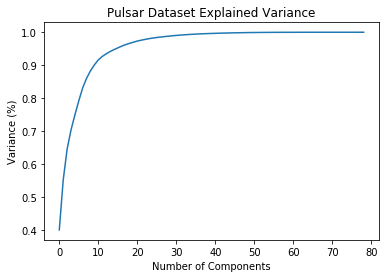

In [95]:
%matplotlib inline

### PRINCIPAL COMPONENT ANALYSIS ###

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Fit PCA algorithm to data 
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

#Plot below shows that 30 components used will preserve somewhere between
#90 and 99% of the total varience of the data

In [96]:
pca = PCA(n_components = 30) #Worked out/justified above
pc_X_train = pca.fit_transform(X_train)
pc_X_test = pca.fit_transform(X_test)

print("PCA X_train dimensions:", pc_X_train.shape)
print("PCA X_test dimensions:", pc_X_test.shape)

PCA X_train dimensions: (31200, 30)
PCA X_test dimensions: (5507, 30)


In [97]:
### With KNearest Neighbor ###

t0 = time()
pca_knn = knn = KNeighborsClassifier()
pca_knn.fit(pc_X_train, y_train.values.ravel())
y_pred = pca_knn.predict(pc_X_test)
print ("KNN accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

KNN accuracy with PCA: 0.9738514617759215
Duration: 4.536957263946533


In [98]:
### With Logistic Regression ###

t0 = time()
pca_logreg = LogisticRegression(solver = 'liblinear')
pca_logreg.fit(pc_X_train, y_train.values.ravel())
y_pred = pca_logreg.predict(pc_X_test)
print ("Logistic Regression accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

Logistic Regression accuracy with PCA: 0.8948610858906846
Duration: 0.706923246383667


In [99]:
### With Random Forest ###

t0 = time()
pca_rf = RandomForestClassifier(n_estimators = 100) #Was getting deprecation warning.
pca_rf.fit(pc_X_train, y_train.values.ravel())
y_pred = pca_rf.predict(pc_X_test)
print ("Random Forest accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

Random Forest accuracy with PCA: 0.9308153259487925
Duration: 27.063085079193115


In [100]:
### With Decision Trees ###

t0 = time()
pca_tree = DecisionTreeClassifier()
pca_tree.fit(pc_X_train, y_train.values.ravel())
y_pred = pca_tree.predict(pc_X_test)
print ("Decision Tree accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

Decision Tree accuracy with PCA: 0.8698020700926095
Duration: 3.2425270080566406


In [101]:
### With KMeans ###

t0 = time()
pca_kmc = KMeans()
pca_kmc.fit(pc_X_train, y_train.values.ravel())
y_pred = pca_kmc.predict(pc_X_test)
print ("KMeans accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

KMeans accuracy with PCA: 0.20210641002360633
Duration: 4.401079416275024


In [102]:
### With KMeans (Unsupervised) ###

t0 = time()
pca_kmc = KMeans()
pca_kmc.fit(pc_X_train)
y_pred = pca_kmc.predict(pc_X_test)
print ("KMeans (unsupervised) accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

KMeans (unsupervised) accuracy with PCA: 0.09678590884329036
Duration: 4.265692472457886


In [103]:
### With Support Vector Machine ###

t0 = time()
pca_svm = SVC(gamma = 'scale') #Was getting deprecation warning.
pca_svm.fit(pc_X_train, y_train.values.ravel())
y_pred = pca_svm.predict(pc_X_test)
print ("Support Vector Machine accuracy with PCA:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[3].append(accuracy_score(y_test, y_pred))

Support Vector Machine accuracy with PCA: 0.9141093154167423
Duration: 41.01118302345276


In [104]:
#Fill gaps in accuracy matrix 
acc_mat[3].append(np.nan)
acc_mat[3].append(np.nan)
acc_mat[3].append(np.nan)

In [105]:
### T-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING ###

from sklearn.manifold import TSNE

#Important to note, I have used the pc_X_train and pc_X_test as inputs,
#which were created above using PCA...

#This is because in the t-SNE documentation it is advised that 
#dimentionality of a dataset is reduced to 50 or lower in order to 
#suppress noise. It also explicitly recommends using PCA to do so...

tsne = TSNE() #Might need to specify n_components 
tsne_X_train = tsne.fit_transform(pc_X_train)
tsne_X_test = tsne.fit_transform(pc_X_test)

print("t-SNE X_train dimensions:", tsne_X_train.shape)
print("t-SNE X_test dimensions:", tsne_X_test.shape)

t-SNE X_train dimensions: (31200, 2)
t-SNE X_test dimensions: (5507, 2)


In [106]:
### With KNearest Neighbor ###

t0 = time()
tsne_knn = KNeighborsClassifier()
tsne_knn.fit(tsne_X_train, y_train.values.ravel())
y_pred = tsne_knn.predict(tsne_X_test)
print ("KNN accuracy with t_SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

KNN accuracy with t_SNE: 0.7005629199201017
Duration: 0.2120828628540039


In [107]:
### With Logistic Regression ###

t0 = time()
tsne_logreg = LogisticRegression(solver = 'liblinear')
tsne_logreg.fit(tsne_X_train, y_train.values.ravel())
y_pred = tsne_logreg.predict(tsne_X_test)
print ("Logistic Regression accuracy with t-SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

Logistic Regression accuracy with t-SNE: 0.7820955147993462
Duration: 0.06691813468933105


In [108]:
### With Random Forest ###

t0 = time()
tsne_rf = RandomForestClassifier(n_estimators = 100) #Was getting deprecation warning.
tsne_rf.fit(tsne_X_train, y_train.values.ravel())
y_pred = tsne_rf.predict(tsne_X_test)
print ("Random Forest accuracy with t-SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

Random Forest accuracy with t-SNE: 0.7090975122571272
Duration: 5.815034866333008


In [109]:
### With Decision Trees ###

t0 = time()
tsne_tree = DecisionTreeClassifier()
tsne_tree.fit(tsne_X_train, y_train.values.ravel())
y_pred = tsne_tree.predict(tsne_X_test)
print ("Decision Tree accuracy with t-SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

Decision Tree accuracy with t-SNE: 0.6947521336480843
Duration: 0.16831254959106445


In [110]:
### With KMeans ###

t0 = time()
tsne_kmc = KMeans()
tsne_kmc.fit(tsne_X_train, y_train.values.ravel())
y_pred = tsne_kmc.predict(tsne_X_test)
print ("KMeans accuracy with t-SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

KMeans accuracy with t-SNE: 0.08116942073724351
Duration: 3.2038965225219727


In [111]:
### With KMeans (Unsupervised) ###

t0 = time()
tsne_kmc = KMeans()
tsne_kmc.fit(tsne_X_train)
y_pred = tsne_kmc.predict(tsne_X_test)
print ("KMeans (unsupervised) accuracy with t-SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

KMeans (unsupervised) accuracy with t-SNE: 0.1508988560014527
Duration: 2.318188190460205


In [112]:
### With Support Vector Machine ###

t0 = time()
tsne_svm = SVC(gamma = 'scale') #Was getting deprecation warning.
tsne_svm.fit(tsne_X_train, y_train.values.ravel())
y_pred = tsne_svm.predict(tsne_X_test)
print ("Support Vector Machine accuracy with t-SNE:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[4].append(accuracy_score(y_test, y_pred))

Support Vector Machine accuracy with t-SNE: 0.7052841837661159
Duration: 11.142209768295288


In [113]:
#Fill gaps in accuracy matrix 
acc_mat[4].append(np.nan)
acc_mat[4].append(np.nan)
acc_mat[4].append(np.nan)

In [114]:
### ENSAMBLE (FEATURE IMPORTANCE) ###

### ExtraTreeClassifier ###

from sklearn.ensemble import ExtraTreesClassifier

t0 = time()
et = ExtraTreesClassifier(n_estimators = 100) #To "Future Warning" I was getting.
et.fit(X_train, y_train.values.ravel())
y_pred = et.predict(X_test)
print ("ExtraTreeClassifier accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

ExtraTreeClassifier accuracy: 0.9929181042309787
Duration: 6.813580513000488


In [115]:
### ADABoost Classifier ###

from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import roc_auc_score

#ADABoost requires a base estimator to be provided...

#Fill gap for missing KNN in accuracy matrix
acc_mat[5].append(np.nan)

In [116]:
### ADABoost With Logistic Regression ###
logreg = LogisticRegression(solver = 'liblinear')

t0 = time()
ada_logreg = AdaBoostClassifier(base_estimator = logreg)
ada_logreg.fit(X_train, y_train.values.ravel())
y_pred = ada_logreg.predict(X_test)
print ("ADABoost with Logistic Regression accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[5].append(accuracy_score(y_test, y_pred))

ADABoost with Logistic Regression accuracy: 0.8378427455965135
Duration: 11.855224609375


In [117]:
### ADABoost With Random Forest ###
rf = RandomForestClassifier(n_estimators = 100)

t0 = time()
ada_rf = AdaBoostClassifier(base_estimator = rf)
ada_rf.fit(X_train, y_train.values.ravel())
y_pred = ada_rf.predict(X_test)
print ("ADABoost with Random Forest accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[5].append(accuracy_score(y_test, y_pred))

ADABoost with Random Forest accuracy: 0.9934628654439804
Duration: 11.480770587921143


In [118]:
### ADABoost With Decision Trees ###
dt = DecisionTreeClassifier()

t0 = time()
ada_dt = AdaBoostClassifier(base_estimator = dt)
ada_dt.fit(X_train, y_train.values.ravel())
y_pred = ada_dt.predict(X_test)
print ("ADABoost with Decision Tree accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[5].append(accuracy_score(y_test, y_pred))

ADABoost with Decision Tree accuracy: 0.987652079171963
Duration: 1.944486379623413


In [119]:
### ADABoost With KMeans ###
kmc = KMeans()

t0 = time()
ada_kmc = AdaBoostClassifier(base_estimator = dt)
ada_kmc.fit(X_train, y_train.values.ravel())
y_pred = ada_kmc.predict(X_test)
print ("ADABoost with KMeans accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[5].append(accuracy_score(y_test, y_pred))
acc_mat[5].append(np.nan)

ADABoost with KMeans accuracy: 0.9867441438169602
Duration: 1.974719524383545


In [120]:
### ADABoost With Support Vector Machines ###
svm = SVC(gamma = 'scale')

t0 = time()
ada_svm = AdaBoostClassifier(base_estimator = dt)
ada_svm.fit(X_train, y_train.values.ravel())
y_pred = ada_svm.predict(X_test)
print ("ADABoost with Support Vector Machine accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[5].append(accuracy_score(y_test, y_pred))

ADABoost with Support Vector Machine accuracy: 0.9872889050299619
Duration: 1.9846422672271729


In [ ]:
#Fill gaps in accuracy matrix
acc_mat[5].append(np.nan)
acc_mat[5].append(np.nan)
acc_mat[5].append(np.nan)

In [121]:
### GradientBoostingClassifier ###

from sklearn.ensemble import GradientBoostingClassifier

t0 = time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train.values.ravel())
y_pred = gbc.predict(X_test)
print ("Gradient Boosting Classifier accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

acc_mat[1].append(accuracy_score(y_test, y_pred))

Gradient Boosting Classifier accuracy: 0.9733067005629199
Duration: 19.397069454193115


In [27]:
### XGBoost ###

import xgboost as xgb

t0 = time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train.values.ravel())
y_pred = xgboost.predict(X_test)
print ("XGBoost accuracy:", accuracy_score(y_test, y_pred))
print ("Duration:", time() - t0)

# acc_mat[1].append(accuracy_score(y_test, y_pred))

XGBoost accuracy: 0.9765752678409297
Duration: 10.309298038482666


In [122]:
#Convert accuracy matrix list into DataFrame
accuracy_matrix = pd.DataFrame(acc_mat)
accuracy_matrix = accuracy_matrix.transpose()
accuracy_matrix.columns = ['Algorithm', 'Baseline', 'RFE', 'PCA', 't-SNE', 'ADABoost']

accuracy_matrix

,Algorithm,Baseline,RFE,PCA,t-SNE,ADABoost
0,KNN,0.986381,NaN,0.973851,0.700563,NaN
1,LogReg,0.916288,0.920828,0.894861,0.782096,0.837843
2,Random Forest,0.992918,0.920828,0.930815,0.709098,0.993463
3,Decision Tree,0.98747,0.920828,0.869802,0.694752,0.987652
4,KMeans,0.142909,NaN,0.202106,0.0811694,0.986744
5,KMeans (Unsupervised),0.114218,NaN,0.0967859,0.150899,NaN
6,SVM,0.920828,NaN,0.914109,0.705284,0.987289
7,ExtraTreeClassifier,0.992918,NaN,NaN,NaN,None
8,GradientBoostingClassifier,0.973307,NaN,NaN,NaN,None
